In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [64]:
data=pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
rows=data.shape[0]
cols=data.shape[1]
print(rows,cols)
print("column labels:")
print(data.columns.to_list())

891 12
column labels:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [66]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Embarked']


0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [71]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [72]:
data.shape

(891, 12)

In [73]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

NameError: name 'ax' is not defined

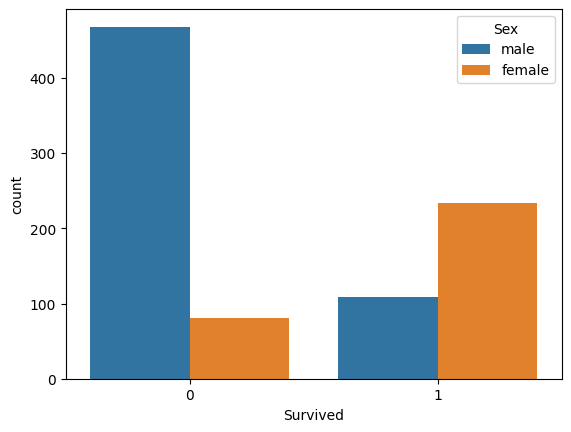

In [76]:
sns.countplot(x=data['Survived'], hue=data['Sex'])
ax.set_xlabel('Survived', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Survival Counts by Sex', fontsize=14)

plt.tight_layout()
plt.show()

NameError: name 'ax' is not defined

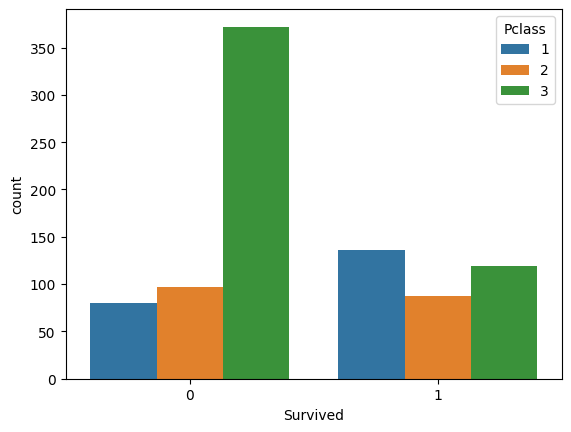

In [78]:
sns.countplot(x=data['Survived'], hue=data['Pclass'])
ax.set_xlabel('Survived', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Survival Counts by Pclass', fontsize=14)

plt.tight_layout()
plt.show()

In [81]:
mean_survival = {'male': 0.0,  'female': 0.0  }

for index, row in data.iterrows():
    sex = row['Sex']
    survived = row['Survived']
    
    if sex == 'male':
        mean_survival['male'] += survived
    else:
        mean_survival['female'] += survived

total_males = len(data[data['Sex'] == 'male'])
total_females = len(data[data['Sex'] == 'female'])

mean_survival['male'] /= total_males
mean_survival['female'] /= total_females
for sex, mean in mean_survival.items():
    print(f"Mean survival rate for {sex}: {mean}")

Mean survival rate for male: 0.18890814558058924
Mean survival rate for female: 0.7420382165605095


In [84]:
Label = LabelEncoder()
data['Sex']=Label.fit_transform(data['Sex'])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [85]:
x=data[['Pclass','Sex']]
y=data['Survived']
print(x,y)

     Pclass  Sex
0         3    1
1         1    0
2         3    0
3         1    0
4         3    1
..      ...  ...
886       2    1
887       1    0
888       3    0
889       1    1
890       3    1

[891 rows x 2 columns] 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [86]:
df1=x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=2)
print(df1)

[     Pclass  Sex
451       3    1
345       2    0
687       3    1
279       3    0
742       1    0
..      ...  ...
534       3    0
584       3    1
493       1    1
527       1    1
168       1    1

[623 rows x 2 columns],      Pclass  Sex
707       1    1
37        3    1
615       2    0
169       3    1
68        3    0
..      ...  ...
842       1    0
671       1    1
696       3    1
42        3    1
396       3    0

[268 rows x 2 columns], 451    0
345    1
687    0
279    1
742    1
      ..
534    0
584    0
493    0
527    0
168    0
Name: Survived, Length: 623, dtype: int64, 707    1
37     0
615    1
169    0
68     1
      ..
842    1
671    0
696    0
42     0
396    0
Name: Survived, Length: 268, dtype: int64]


In [87]:

model = LogisticRegression()
y_pred=model.fit(x_train, y_train)
y_pred


LogisticRegression()

In [88]:
y_pred = model.predict(x_test) 
accuracy = accuracy_score(y_test, y_pred)  # Now use the predicted values 'y_pred'
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.7687


In [89]:
print(y_test)

707    1
37     0
615    1
169    0
68     1
      ..
842    1
671    0
696    0
42     0
396    0
Name: Survived, Length: 268, dtype: int64


In [90]:
model.predict(x_train)

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [91]:
sample_input = pd.DataFrame([[3, 0]], columns=['Pclass', 'Sex'])
prediction = model.predict(sample_input)
if prediction[0] == 0:
    print("The passenger did not survive.")
else:
    print("The passenger survived.")

The passenger survived.
